# Sales Data Analysis
## Below dataset contains a years sales data of some random e-commerce site in USA. We will use this dataset to analyze below points and provide our insights:-
### 1. Total revenue analysis/ Sales by time period(Seasonal sales)
### 2. Best selling products
### 3. Average order value
### 4. Geographical Insights
### 5. Price Analysis
### 6. Cross-Selling Opportunities
### 7. Order Time Patterns


In [127]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
path = 'D:\osama\pandas data analysis\SalesAnalysis\Sales_Data'

files = [file for file in os.listdir(path)]

all_month_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+'/'+file)
    all_month_data = pd.concat([all_month_data, current_data])

In [150]:
all_month_data.to_csv('all_data.csv', index=False)
df = pd.read_csv(r'D:\osama\Exploratory-Data-Analysis\e_comm_sales_analysis\output\all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Data Cleaning

In [130]:
#while concating all the files we also got headers of the files on our df. Need to remove them.
df = df[df['Product'] != 'Product']

In [131]:
df.isnull().sum() #identify null values
df.dropna(inplace=True) #drop nulls

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [133]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

## Adding helping columns

In [134]:
# add month column
df['Month'] = pd.to_datetime(df['Order Date']).dt.month
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [135]:
# add city column
def extract_city(address):
    pattern = r',\s*([\w\s]+),\s*([A-Z]{2})\s+\d{5}'
    match = re.search(pattern, address)
    return f"{match.group(1)},{match.group(2)}" if match else None

In [136]:
df['City'] = df['Purchase Address'].apply(extract_city)
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,"Dallas,TX",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,"Boston,MA",99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles,CA",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles,CA",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles,CA",11.99


## Exploratory Data Analysis

### 1. Total Revenue Analysis

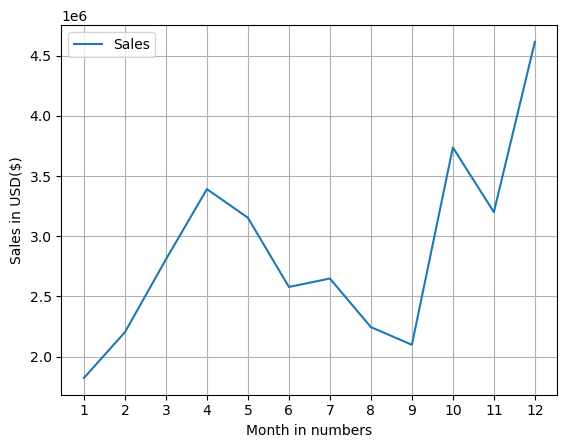

In [137]:
yearly_sales = df.groupby(['Month'], as_index=False)['Sales'].sum()
yearly_sales.plot('Month','Sales', kind='line')
plt.xlabel('Month in numbers')
plt.ylabel('Sales in USD($)')
plt.grid(True)
plt.xticks(range(1,13))
plt.show()

#### an uptrend can be seen which peaked in March likely due to st.patricks day. Lowest sales happened between August and September. Then a new peak sales season started after November and sales going off the charts likely due to chritsmas shoppings. With this we can increase our inventory before month of march and christmas. Special ad campaigns can be run during these periods.

### 2. Best selling products by Price

C:\Users\Zafar Khan\AppData\Local\Temp\ipykernel_19392\1421439686.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_prod = df.groupby('Product').sum()['Sales']


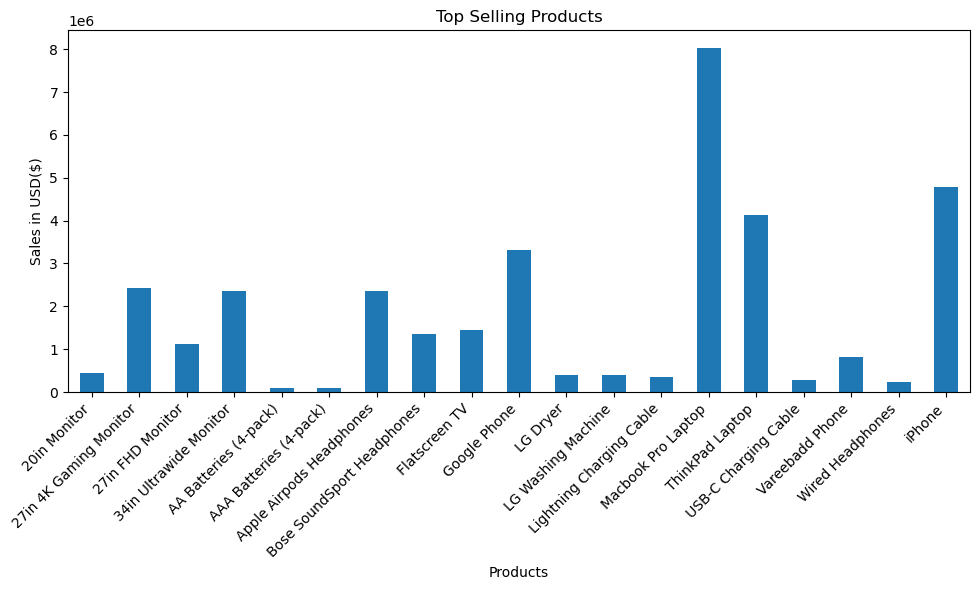

In [138]:
top_prod = df.groupby('Product').sum()['Sales']

plt.figure(figsize=(10, 6))
top_prod.plot(kind='bar')
plt.xlabel('Products')
plt.ylabel('Sales in USD($)')
plt.title('Top Selling Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **Macbook pro laptop** and **iphone** are the best selling products followed by **Thinkpad laptop**. This is likely due to their higher prices.

### 2.1 Best selling product by quantity

<Figure size 1000x600 with 0 Axes>

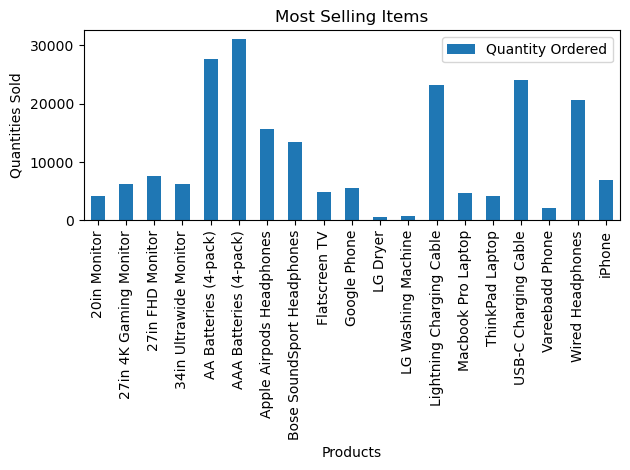

In [139]:
most_sold = df.groupby(['Product'], as_index=False)['Quantity Ordered'].sum()

plt.figure(figsize=(10, 6))
most_sold.plot(x='Product', y='Quantity Ordered', kind='bar')
plt.xlabel('Products')
plt.ylabel('Quantities Sold')
plt.title('Most Selling Items')
plt.tight_layout()
plt.show()

#### Products that are ordered with higher quantities are mostly contains of accessories that are used with other products.

### 3. Average Order Value

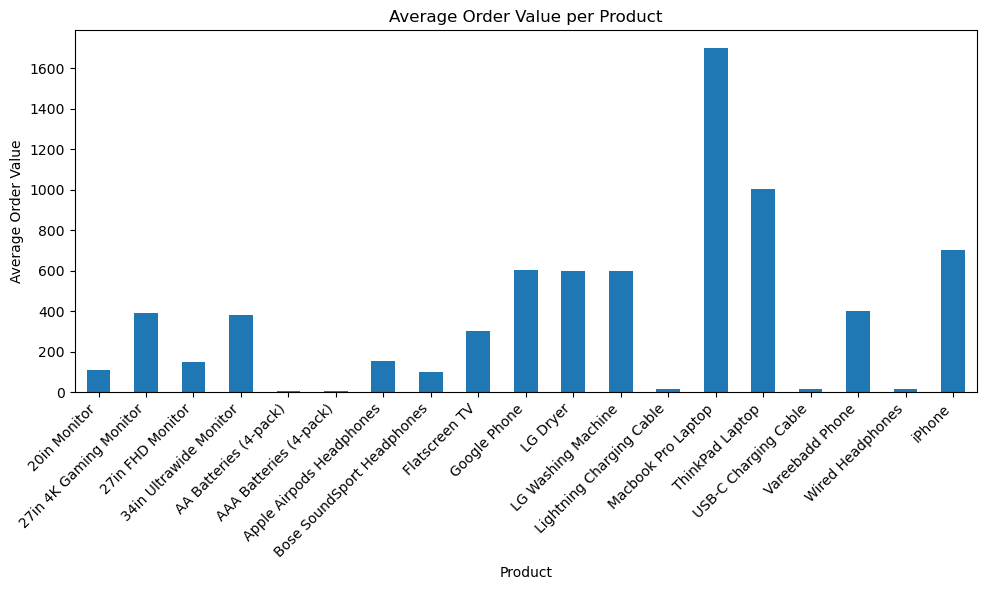

In [140]:
product_group= df.groupby('Product')['Sales'].mean()

plt.figure(figsize=(10, 6))
product_group.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Average Order Value')
plt.title('Average Order Value per Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### The most expensive products we sell contains **Laptops & iphone**.

### 4. Geagraphican Insights

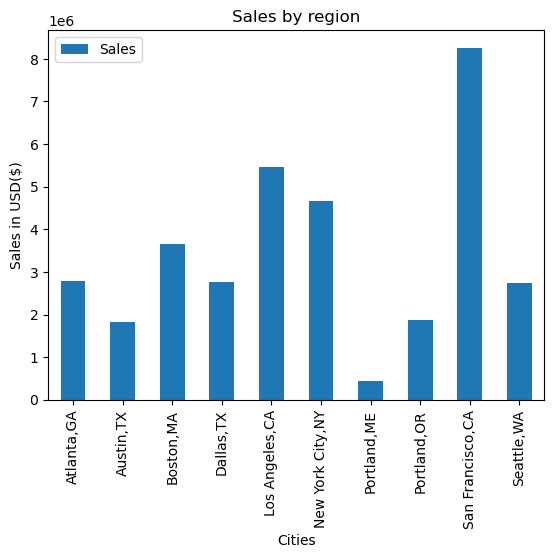

In [141]:
top_city_price = df.groupby(['City'], as_index=False)['Sales'].sum()

top_city_price.plot('City', 'Sales', kind='bar')
plt.xlabel('Cities')
plt.ylabel('Sales in USD($)')
plt.title('Sales by region')
plt.show()

#### **San Francisco, Los Angeles** & **New York** these are the cities with huge sales. We can plan **Targeted Marketting Campaigns**, conduct **Customer Feedback Surveys** and **Enhance Customer Support** for these cities to improve our sales significantly.

### 5. Price Analysis

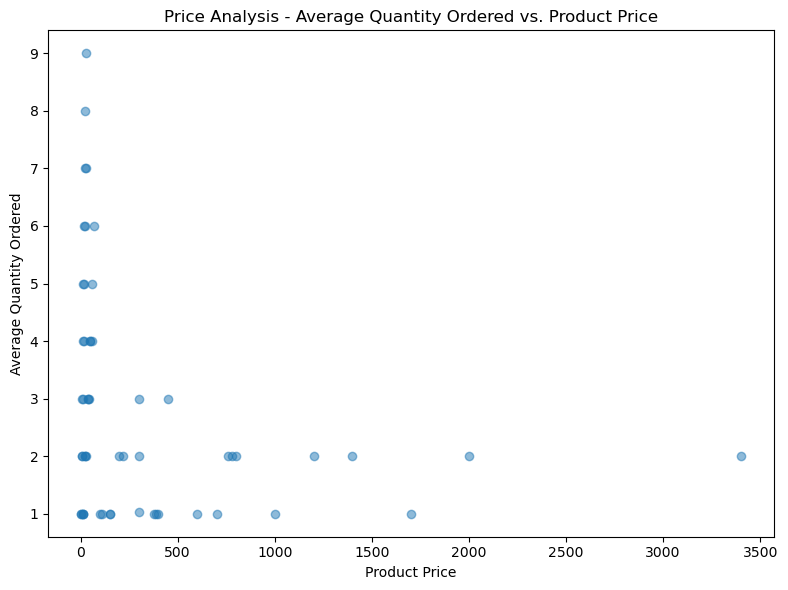

In [142]:
price_analysis = df.groupby('Sales')['Quantity Ordered'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(price_analysis['Sales'], price_analysis['Quantity Ordered'], alpha=0.5)
plt.xlabel('Product Price')
plt.ylabel('Average Quantity Ordered')
plt.title('Price Analysis - Average Quantity Ordered vs. Product Price')
plt.tight_layout()
plt.show()

#### Products in range of **0-500 dollars** were ordered in greate quantities due to lower prices and they mostly contains accessory products which gets damaged easily and henced people buys them more often. Products hvaing price more than 3000 dollars are very few which contains **macbook laptops**.

### 6. Cross-Selling Opportunities

In [143]:
order_products = df.groupby('Order ID')['Product'].apply(list)
cross_sell_opportunities = []

for products in order_products:
    if len(products) > 1:
        cross_sell_opportunities.extend([(products[i], products[j]) for i in range(len(products)) for j in range(i+1, len(products))])

cross_sell_df = pd.DataFrame(cross_sell_opportunities, columns=['Product_A', 'Product_B'])
cross_sell_counts = cross_sell_df.groupby(['Product_A', 'Product_B']).size().reset_index(name='Count')
sorted_cross_sell_opportunities = cross_sell_counts.sort_values(by='Count', ascending=False)

In [144]:
sorted_cross_sell_opportunities.head(10)

,Product_A,Product_B,Count
306,iPhone,Lightning Charging Cable,1005
169,Google Phone,USB-C Charging Cable,987
311,iPhone,Wired Headphones,447
171,Google Phone,Wired Headphones,414
274,Vareebadd Phone,USB-C Charging Cable,361
301,iPhone,Apple Airpods Headphones,360
163,Google Phone,Bose SoundSport Headphones,220
261,USB-C Charging Cable,Wired Headphones,160
275,Vareebadd Phone,Wired Headphones,143
209,Lightning Charging Cable,Wired Headphones,92


#### Most items that are sold together are **phones with either earphones or charging cables**. Please refer to the above table with top 10 items sold together.

### 7. Order Time Pattern

In [145]:
# lets add Hour column to track the time of sale. also adding a column to count the number of times specific hour repeated.
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Counter'] = 1

C:\Users\Zafar Khan\AppData\Local\Temp\ipykernel_19392\3613481969.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  hours = [hours for hours,df in df.groupby(['Hour'])]


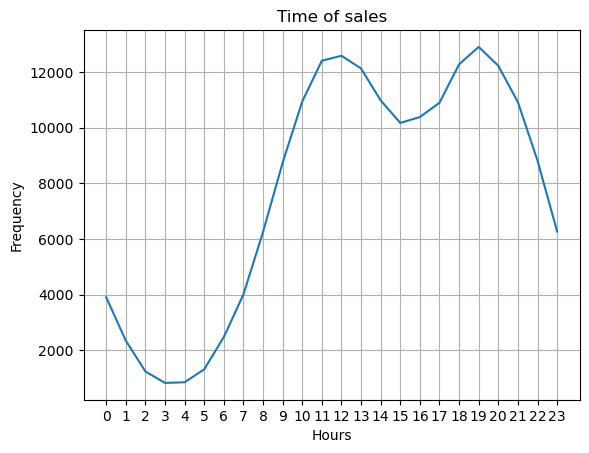

In [146]:
hours = [hours for hours,df in df.groupby(['Hour'])]

plt.plot(hours, df.groupby(['Hour']).count()['Counter'])
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Time of sales')
plt.xticks(hours)
plt.grid(True)
plt.show()

#### Most of the sale happened right after 10AM and 6pm. So my recommendation would be to advertise between 9:30AM-10AM or 5:30PM-6PM to get the attention of potential buyers.